In [26]:
import pandas as pd

# 读取 CSV 文件
df = pd.read_csv('bike_share_yr_0.csv')
df['dteday']=pd.to_datetime(df['dteday'],errors='coerce')
# 查看前 5 行数据
print(df.head())
print(df.dtypes)
# 显示所有列名
print(df.columns)

      dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0 2021-01-01       1   0     1   0        0        6           0           1   
1 2021-01-01       1   0     1   1        0        6           0           1   
2 2021-01-01       1   0     1   2        0        6           0           1   
3 2021-01-01       1   0     1   3        0        6           0           1   
4 2021-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed rider_type  riders  
0  0.24  0.2879  0.81        0.0     casual       3  
1  0.22  0.2727  0.80        0.0     casual       8  
2  0.22  0.2727  0.80        0.0     casual       5  
3  0.24  0.2879  0.75        0.0     casual       3  
4  0.24  0.2879  0.75        0.0     casual       0  
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday              

In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17290 entries, 0 to 17289
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      6858 non-null   datetime64[ns]
 1   season      17290 non-null  int64         
 2   yr          17290 non-null  int64         
 3   mnth        17290 non-null  int64         
 4   hr          17290 non-null  int64         
 5   holiday     17290 non-null  int64         
 6   weekday     17290 non-null  int64         
 7   workingday  17290 non-null  int64         
 8   weathersit  17290 non-null  int64         
 9   temp        17290 non-null  float64       
 10  atemp       17290 non-null  float64       
 11  hum         17290 non-null  float64       
 12  windspeed   17290 non-null  float64       
 13  rider_type  17290 non-null  object        
 14  riders      17290 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(9), object(1)
memory usage: 2.

In [28]:
print(df['season'].unique())  # 你可以查看一共有多少个不同的 season
print(df['weathersit'].value_counts())  # 统计不同天气情况的数量

[1 2 3 4]
weathersit
1    11290
2     4436
3     1562
4        2
Name: count, dtype: int64


In [29]:
monthly_rides = df.groupby('mnth')['riders'].sum()
print(monthly_rides)

mnth
1      38189
2      48215
3      64045
4      94870
5     135821
6     143512
7     141341
8     136691
9     127418
10    123511
11    102167
12     87323
Name: riders, dtype: int64


In [30]:
weather_riders = df.groupby('weathersit')['riders'].mean()
print(weather_riders)

weathersit
1    77.506909
2    67.745491
3    43.210627
4    18.000000
Name: riders, dtype: float64


In [31]:
holiday_rides = df.groupby('holiday')['riders'].mean()
print(holiday_rides)

holiday
0    72.155663
1    62.807531
Name: riders, dtype: float64


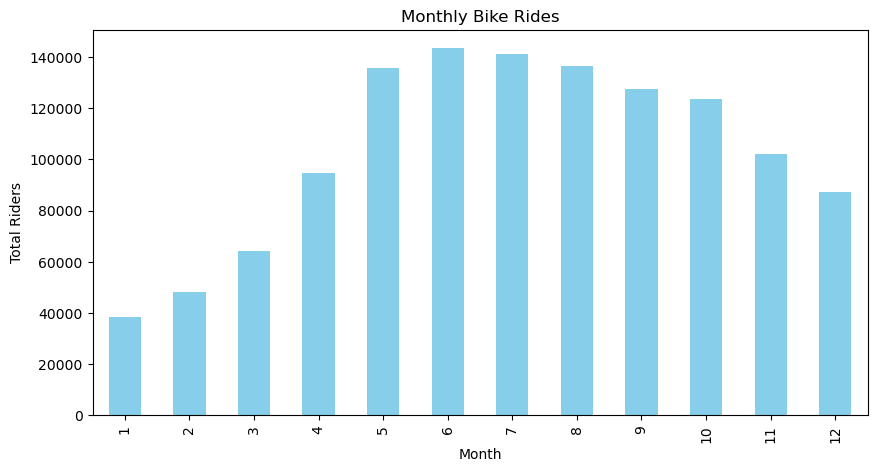

In [32]:
import matplotlib.pyplot as plt

monthly_rides.plot(kind='bar', figsize=(10, 5), color='skyblue')
plt.title('Monthly Bike Rides')
plt.xlabel('Month')
plt.ylabel('Total Riders')
plt.show()

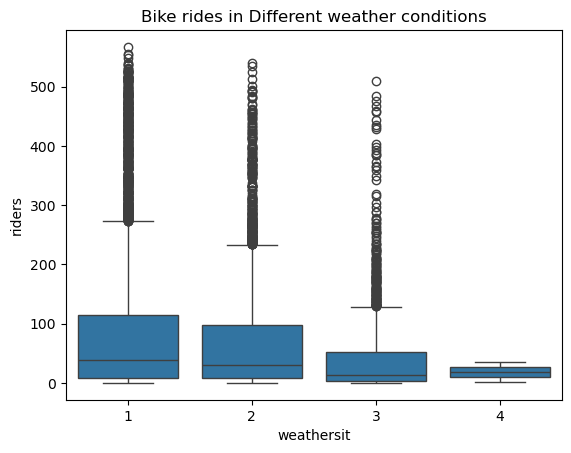

In [33]:
import seaborn as sns
sns.boxplot(x = df['weathersit'],y=df['riders'])
plt.title('Bike rides in Different weather conditions')
plt.show()

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X=df[['temp','hum','windspeed']]
y=df['riders']
X_train, X_test,y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)
print(predictions[:10])

[101.59484822  42.74144568  79.65914005  34.64882187   8.49719783
  16.95004052  84.30508189  70.79520055 115.58702692 140.22143716]


In [35]:
# 保存修正后的 CSV
df.to_csv('bike_share_fixed.csv', index=False)

